## Teilnehmer Anzahl <br>
Der erste Codeteil berechnet die Teilnehmeranzahl für jede Umfrage und zeichnet sie in einem Säulendiagramm auf.

    A    B    C    D    E
0   7    3   17    2    1
1   2    2    2    5    6
2   6    4   16    1    1
3   0    1    1    1   17
4   1    0    7   14    2
5   0    1    2    1   12
6   3    1    0   12    0
7   2   13    4    1    0
8   5    1    7    2    0
9   2    1    0    2    9
10  0    5    2    1    0
11  5    2    3    1    0
12  3    1    5    1    0
13  4    1    5    1    2


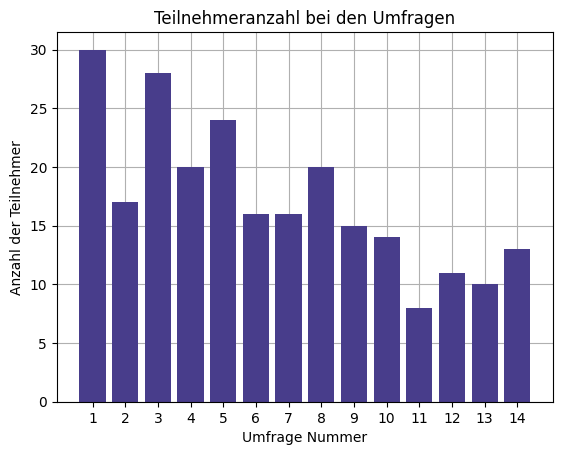

In [16]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.odr as odr
from scipy.optimize import curve_fit
from scipy.integrate import quad
import numpy as np
import csv
import os
import pandas as pd
from sklearn.metrics import r2_score

path= os.path.dirname(os.path.abspath(''))
teilnehmer = []
data = pd.read_csv(f'{path}\\PC\\pingodaten.csv', sep=',', header=0) #hier die eigene csv-Datei einfügen
print(data)
for i in range(0,14): 
    row = data.iloc[[i]]
    line = np.ravel(row, order='C')
    
    t = np.sum(line[0:len(line)])
    
    teilnehmer.append(t)

umfragenummer = np.arange(1,15,1)

fig,ax = plt.subplots()
plt.grid(zorder = 1)
ax.bar(umfragenummer,teilnehmer,color= 'darkslateblue', zorder=2)
ax.set_xlabel('Umfrage Nummer')
ax.set_ylabel('Anzahl der Teilnehmer')
ax.set_title('Teilnehmeranzahl bei den Umfragen')
ax.set_xticks(umfragenummer)   
plt.show()

## Anworten <br>

In der nächsten Abbildung wird für jede Umfrage dargestellt, wie die Verteilung der gewählten MC-Optionen von den Teilnehmern ist.

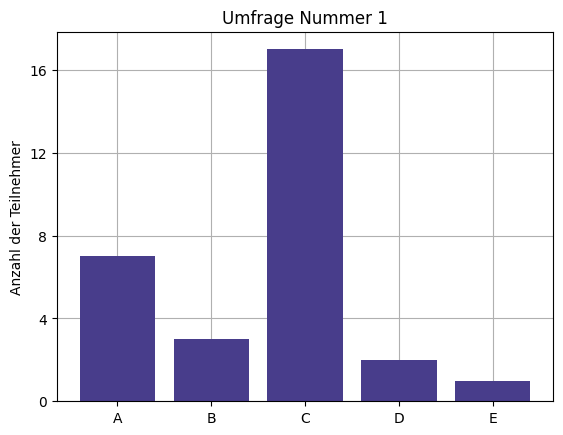

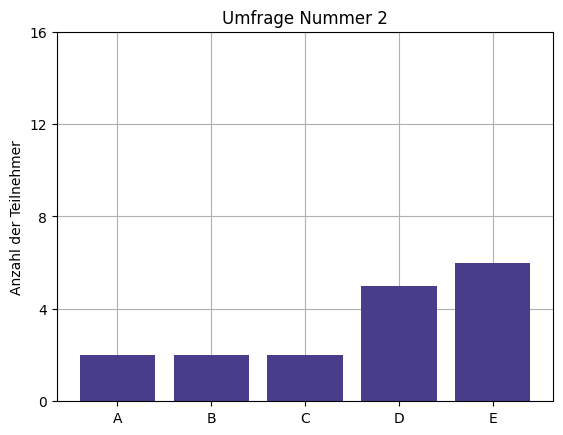

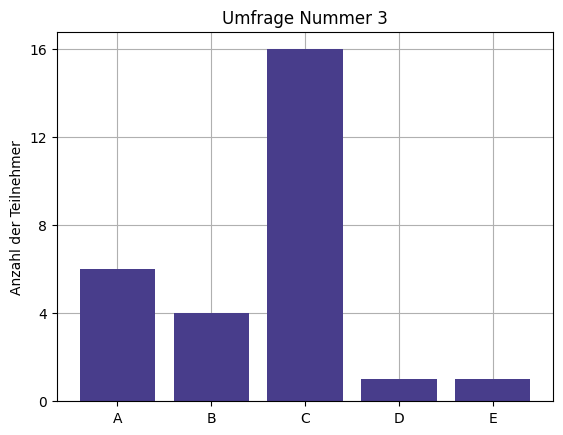

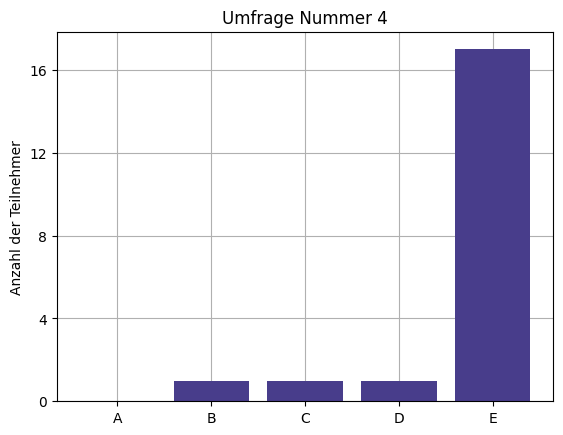

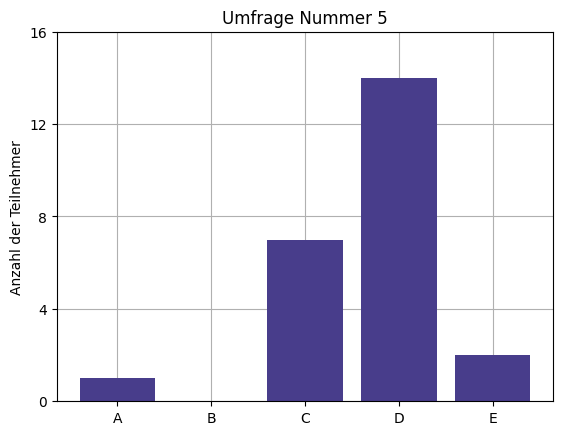

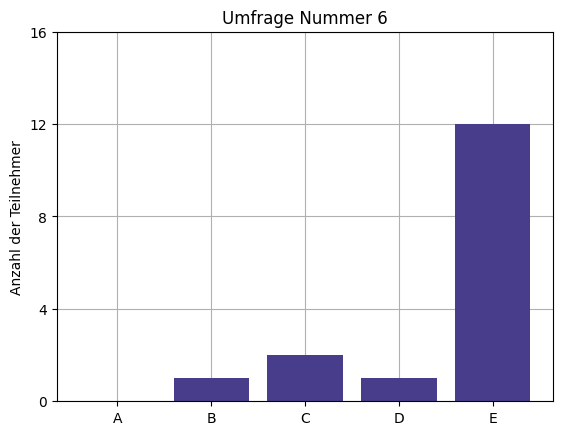

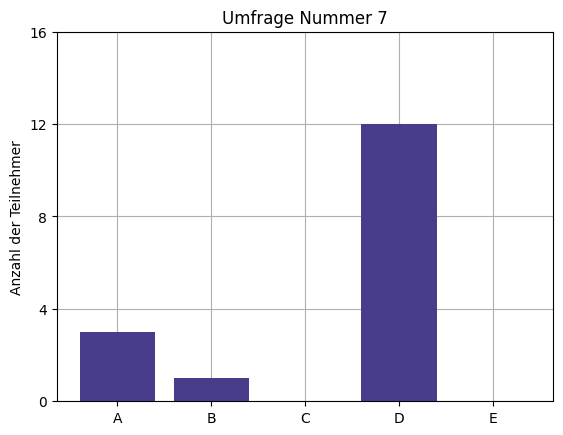

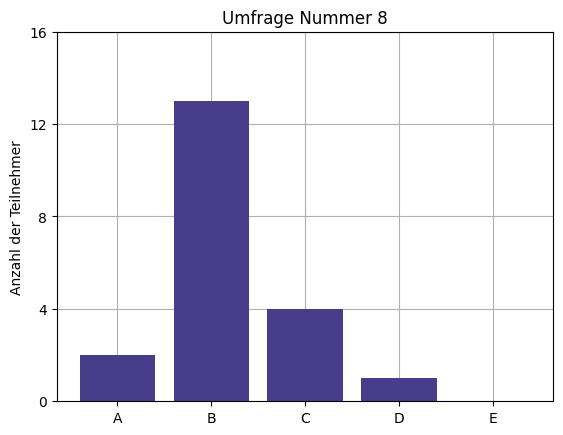

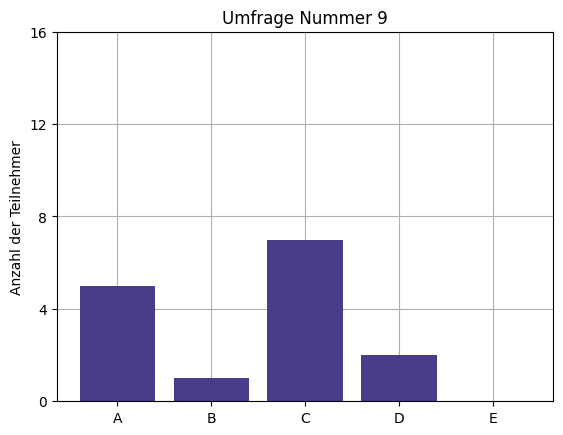

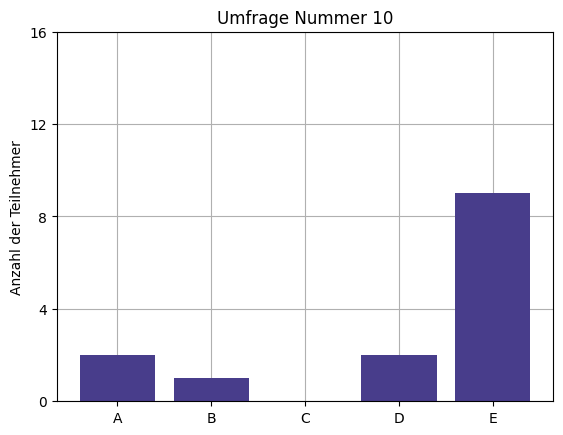

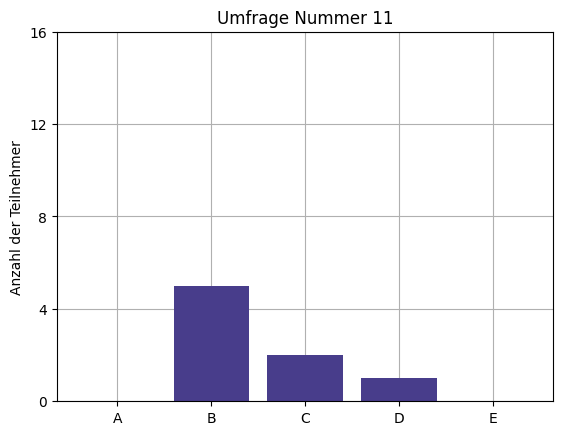

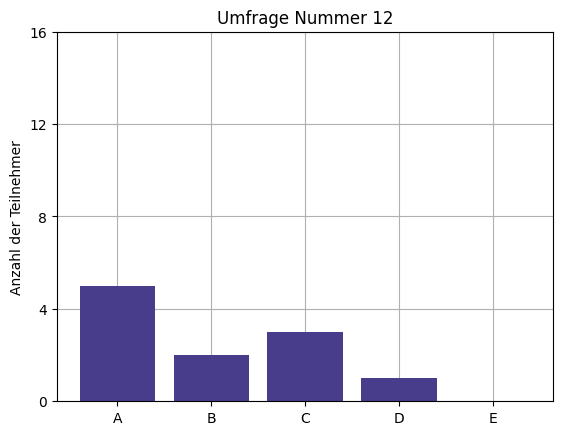

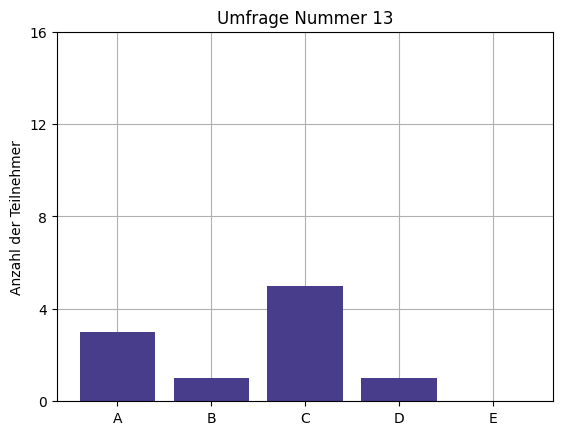

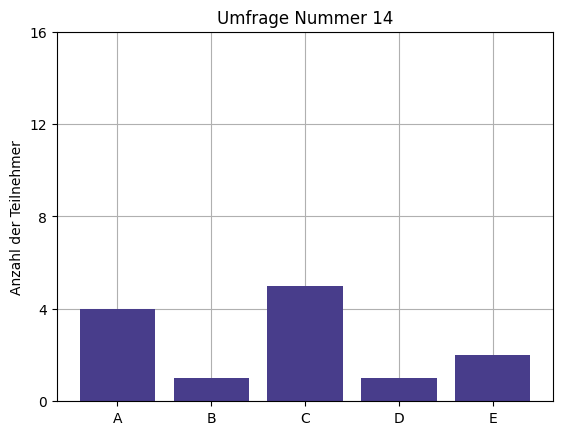

In [20]:
for i in range(0,14): 
    row = data.iloc[[i]]
    line = np.ravel(row, order='C')

    A = line[0]
    B = line[1]
    C = line[2]
    D = line[3]
    E = line[4]

    option = ['A','B','C','D','E']
    fig,ax = plt.subplots()
    plt.grid(zorder = 1)
    ax.bar(option,line,color= 'darkslateblue',zorder=2)
    
    ax.set_ylabel('Anzahl der Teilnehmer')
    ax.set_title(f'Umfrage Nummer {i+1}')
    ax.set_xticks(option)
    ax.set_yticks(np.arange(0,20,20/5))   
    plt.savefig(f'{path}\\PC\\Umfrage_{i+1}.png')
    plt.show()
    


## Anzahl der richtigen Antworten <br>
Im nächsten Diagramm werden prozentual die richtigen Anworten von jeweils den gesamten Antworten einer Umfrage aufgetragen.

[56.66666667 35.29411765 57.14285714 85.         58.33333333 75.
 75.         65.         46.66666667 64.28571429 62.5        45.45454545
 50.         38.46153846]


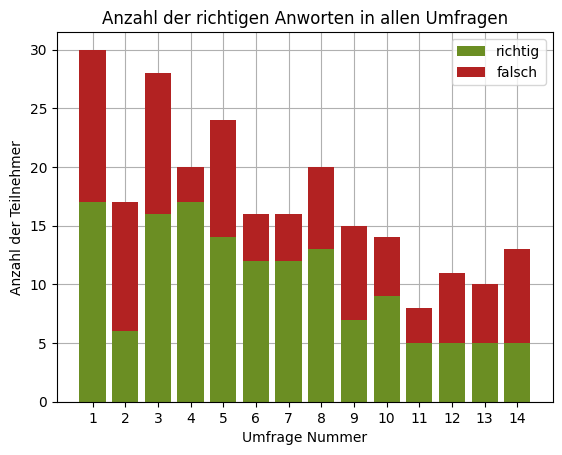

In [21]:

richtig =np.array([17,6,16,17,14,12,12,13,7,9,5,5,5,5])
richtige_prozent = richtig*100/teilnehmer
print(richtige_prozent)
rest = teilnehmer-richtig


antworten = {
    "Richtig": richtig,
    "Falsch": rest,
}


fig, ax = plt.subplots()
bottom = np.zeros(14)
plt.grid(zorder = 1)
colors = ['darkslateblue','olivedrab']
plt.bar(umfragenummer, richtig, color='olivedrab', label='richtig',zorder=2)
plt.bar(umfragenummer, rest, bottom=richtig, color='firebrick', label='falsch',zorder=2)

ax.set_xlabel('Umfrage Nummer')
ax.set_ylabel('Anzahl der Teilnehmer')
ax.set_title("Anzahl der richtigen Anworten in allen Umfragen")
ax.legend(loc="upper right")
ax.set_xticks(umfragenummer)
plt.savefig(f'{path}\\PC\\Richtige_Antworten.png')
plt.show()
